# 포스트 코로나 시대의 배달 산업 현황과 고객 맞춤 전략에 대해

# 들어가며

  최근 들어 확진자 수도 가파르게 증가하고 코로나-19가 장기화되고 있습니다. 코로나-19는 우리의 많은 일상을 바꾸었습니다. 그 중 단연 큰 변화는 식문화입니다. 사회적 거리두기, 5인 이상 집합 금지 등이 장기화 되면서 배달 산업은 더욱 성장하고 있습니다. 고객들은 버튼 몇 개만 누르면 집에서 간편하게 배달 음식을 먹을 수 있습니다.  배달 서비스는 빠르게 고객들의, 사장님들의 생활에 녹아들었습니다. <b>코로나-19로 인해 닥쳐온 위기를 기회로 바꾸어 성공하는 가게도 있지만, 이에 적응하지 못한 가게들은 더욱 힘든 시기를 겪고 있습니다.</b> 저희는 이런 사장님들을 위해 <b> '포스트 코로나 시대의 배달 산업 현황과 고객 맞춤 전략에 대해' </b>을 준비하였습니다. 
  
  본 분석을 위해 데이터 수가 가장 많이 기록된 '구로구'를 중심 지역으로 선정하였습니다.

# 목차 
## 서론
- 한국의 코로나-19 현황
- 코로나-19로 인한 배달산업의 변화

## 본론 
### 1. 코로나-19로 인한 구로구 배달산업 변화
- 월/일/날짜별 배달 건수 및 매출액 분석
- 업종별 배달 건수 분석
- 배달 소요시간 및 거리
- 클러스터링과 애니메이션을 통해 보는 구로구의 배달

### 2. 포스트 코로나 시대의 고객 맞춤 전략
- 맵 시각화를 통해 배달 후보 지역 설정하기

## 결론
### 정리 및 마치며

## 서론  : 코로나-19와 한국

### 한국의 코로나-19 현황

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib.pyplot import *
from matplotlib import animation
from matplotlib import cm

import platform
from matplotlib import font_manager, rc
%matplotlib inline
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

import plotly.offline as py
py.init_notebook_mode(connected = True)
import cufflinks as cf
%config InlineBackend.figure_format = 'retina'
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px
# plotly 시각화
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

from sklearn.cluster import KMeans
from dateutil import parser
import io
import base64
from IPython.display import Image
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 코로나 감연 현황(전국) 데이터 불러오기
corona = pd.read_csv('data/covid_19_dataset/PatientInfo.csv')

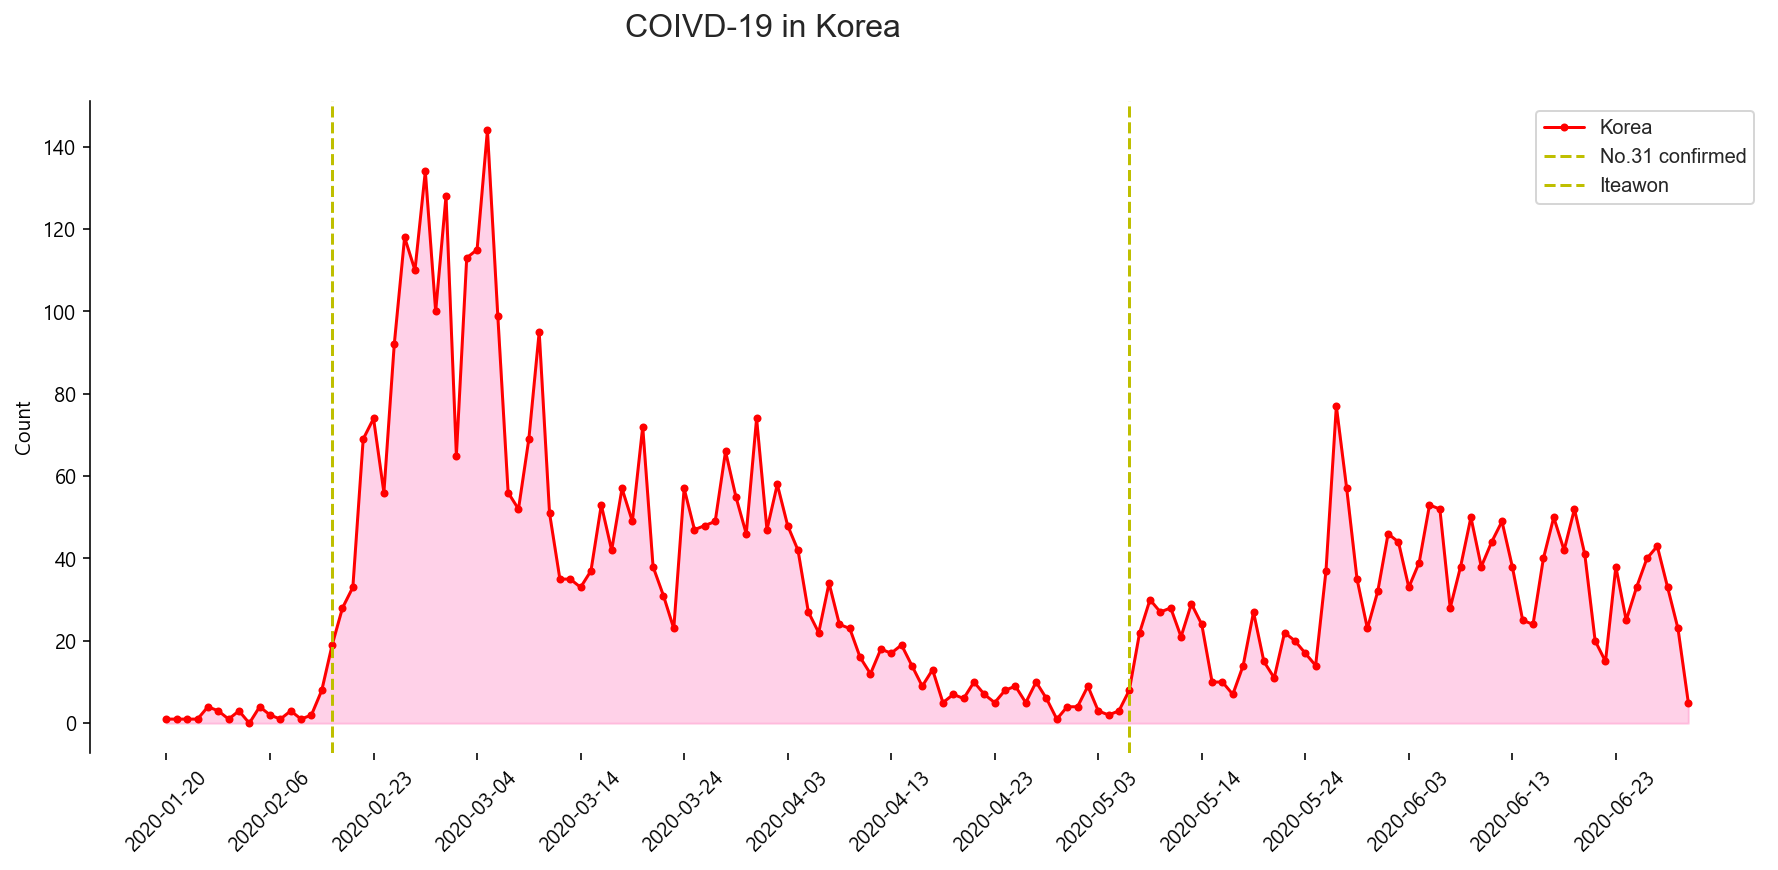

In [3]:
# 한국의 코로나-19 전국  확진자 수 추이
dim = 'confirmed_date'

# 전국
corona_cnt = pd.DataFrame(corona.groupby(dim)[['city']].count().to_records())

# 한국 코로나 19 확진자 추이 시각화
fig, ax = plt.subplots(figsize = (15,6))
x1 = corona_cnt.confirmed_date
y1 = corona_cnt.city

sns.set_style('white')

ax.plot(x1,y1, label = 'Korea', color = 'r', marker = '.')
plt.fill_between(x1, y1, color = 'hotpink', alpha = .3)
plt.axvline(x = '2020-02-19', color = 'y', linestyle = '--', label = 'No.31 confirmed')
plt.axvline(x = '2020-05-07', color = 'y', linestyle = '--', label = 'Iteawon')
ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation = 45)
plt.suptitle("COIVD-19 in Korea", size = 16, ha = 'right')
plt.ylabel('Count')
plt.legend()
sns.despine(top = True, bottom = True)
plt.show()

In [4]:
# 서울/경기를 포함한 수도권 코로나-19 확진자 수
capital_corona = corona.loc[(corona['province'] == 'Seoul') | (corona['province'] == 'Gyeonggi-do')].reset_index(drop = True)
corona_cnt_capital= pd.DataFrame(capital_corona.groupby(dim)[['city']].count().to_records())

# 구로구 코로나-19 확진자 수
guro_corona = capital_corona[capital_corona['city'] == 'Guro-gu'].reset_index(drop = True)
corona_cnt_guro = pd.DataFrame(guro_corona.groupby(dim)[['city']].count().to_records())

# 경북/대구의 코로나-19 확진자 수
gyungbook_corona = corona.loc[(corona['province'] == 'Gyeongsangbuk-do') | (corona['province'] == 'Daegu')]
corona_cnt_gyungbook = pd.DataFrame(gyungbook_corona.groupby(dim)[['city']].count().to_records())

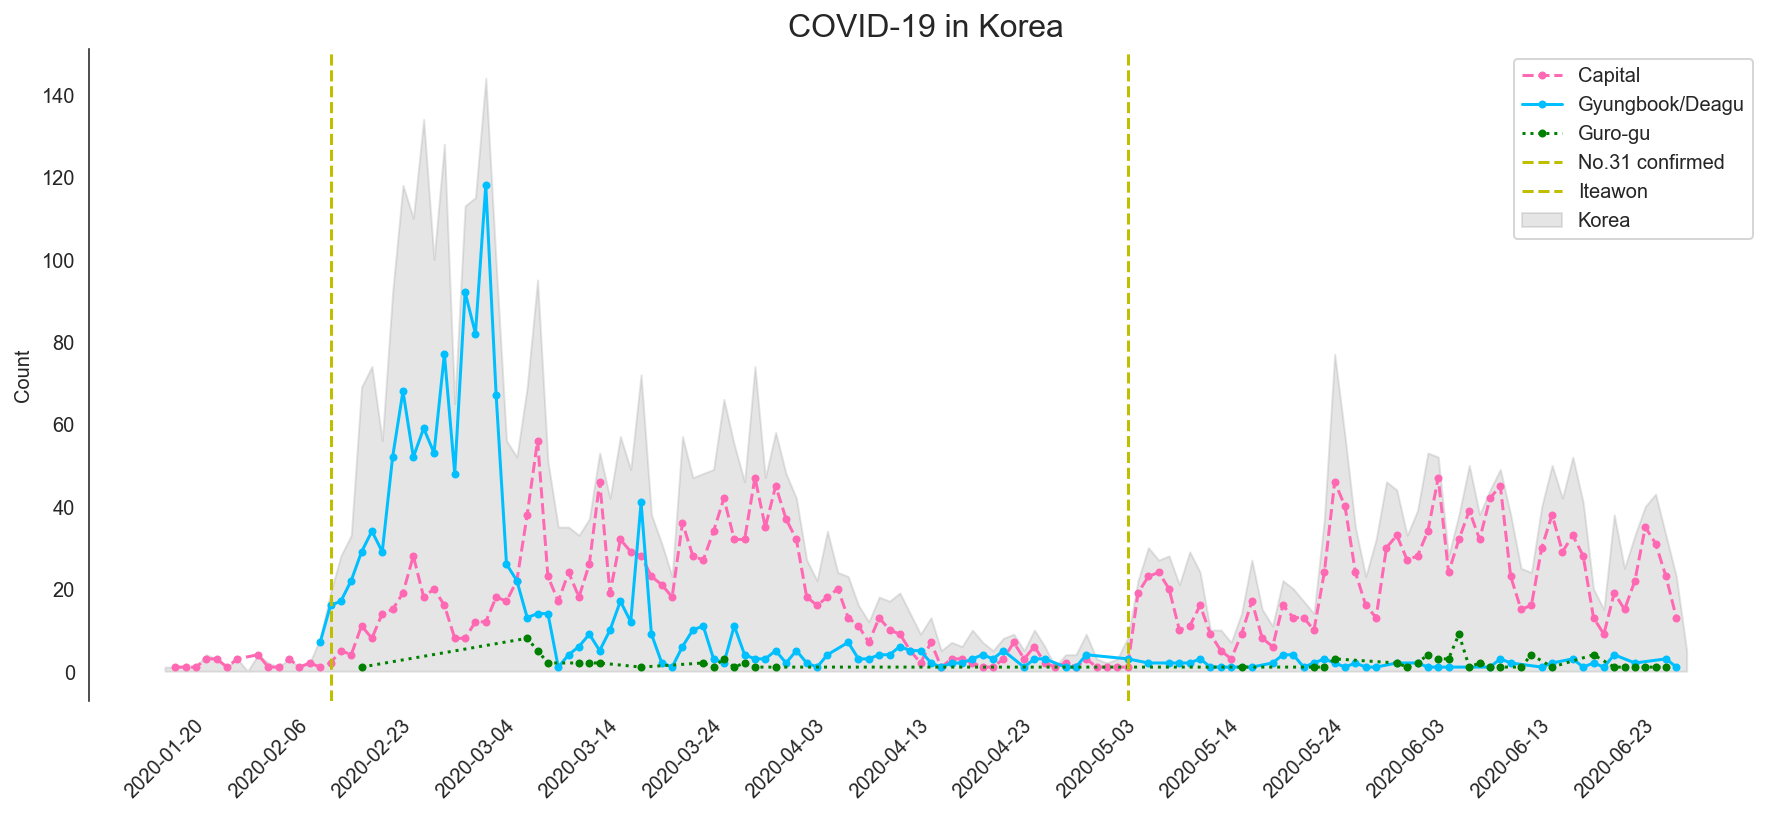

In [5]:
# 한국 코로나 19 확진자 추이 시각화
fig, ax = plt.subplots(figsize = (15,6))

x2 = corona_cnt_capital.confirmed_date
y2 = corona_cnt_capital.city

x3 = corona_cnt_gyungbook.confirmed_date
y3 = corona_cnt_gyungbook.city

x4 = corona_cnt_guro.confirmed_date
y4 = corona_cnt_guro.city

plt.fill_between(x1, y1, color = 'gray', alpha = .2, label = 'Korea')
ax.plot(x2, y2, color = 'hotpink', label = 'Capital', linestyle = '--', marker = '.')
ax.plot(x3, y3, color = 'deepskyblue', label = 'Gyungbook/Deagu', linestyle ='-', marker = '.')
ax.plot(x4, y4, color = 'green', label = 'Guro-gu', linestyle = ':', marker = '.')
plt.axvline(x = '2020-02-19', color = 'y', linestyle = '--', label = 'No.31 confirmed')
plt.axvline(x = '2020-05-07', color = 'y', linestyle = '--', label = 'Iteawon')
ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation = 45)
plt.title("COVID-19 in Korea", size = 16)
plt.ylabel('Count')
plt.legend()
sns.despine(top = True, bottom = True)
plt.show()

2020년 1월 20일, 국내 코로나-19 확진자가 처음 나왔습니다. <b>2월경에 대구 신천지 집단 감염 이후로, 경북/대구 지역의 확진자가 급속도로 증가하였습니다. </b>그에 따른 파급 효과로 서울/경기 지방의 코로나-19 확진자 수도 증가하는 것을 확인 할 수 있습니다. 4, 5월경의 경북/대구 지역 코로나-19 확진자는 소강 상태로 보이면서 종식 되나 했지만 <b> 이태원 클럽 집단 감염으로 인해 서울/경기 지방의 코로나-19 확진자 수는 재증가하고 있습니다.</b>

### 코로나-19 감염경로

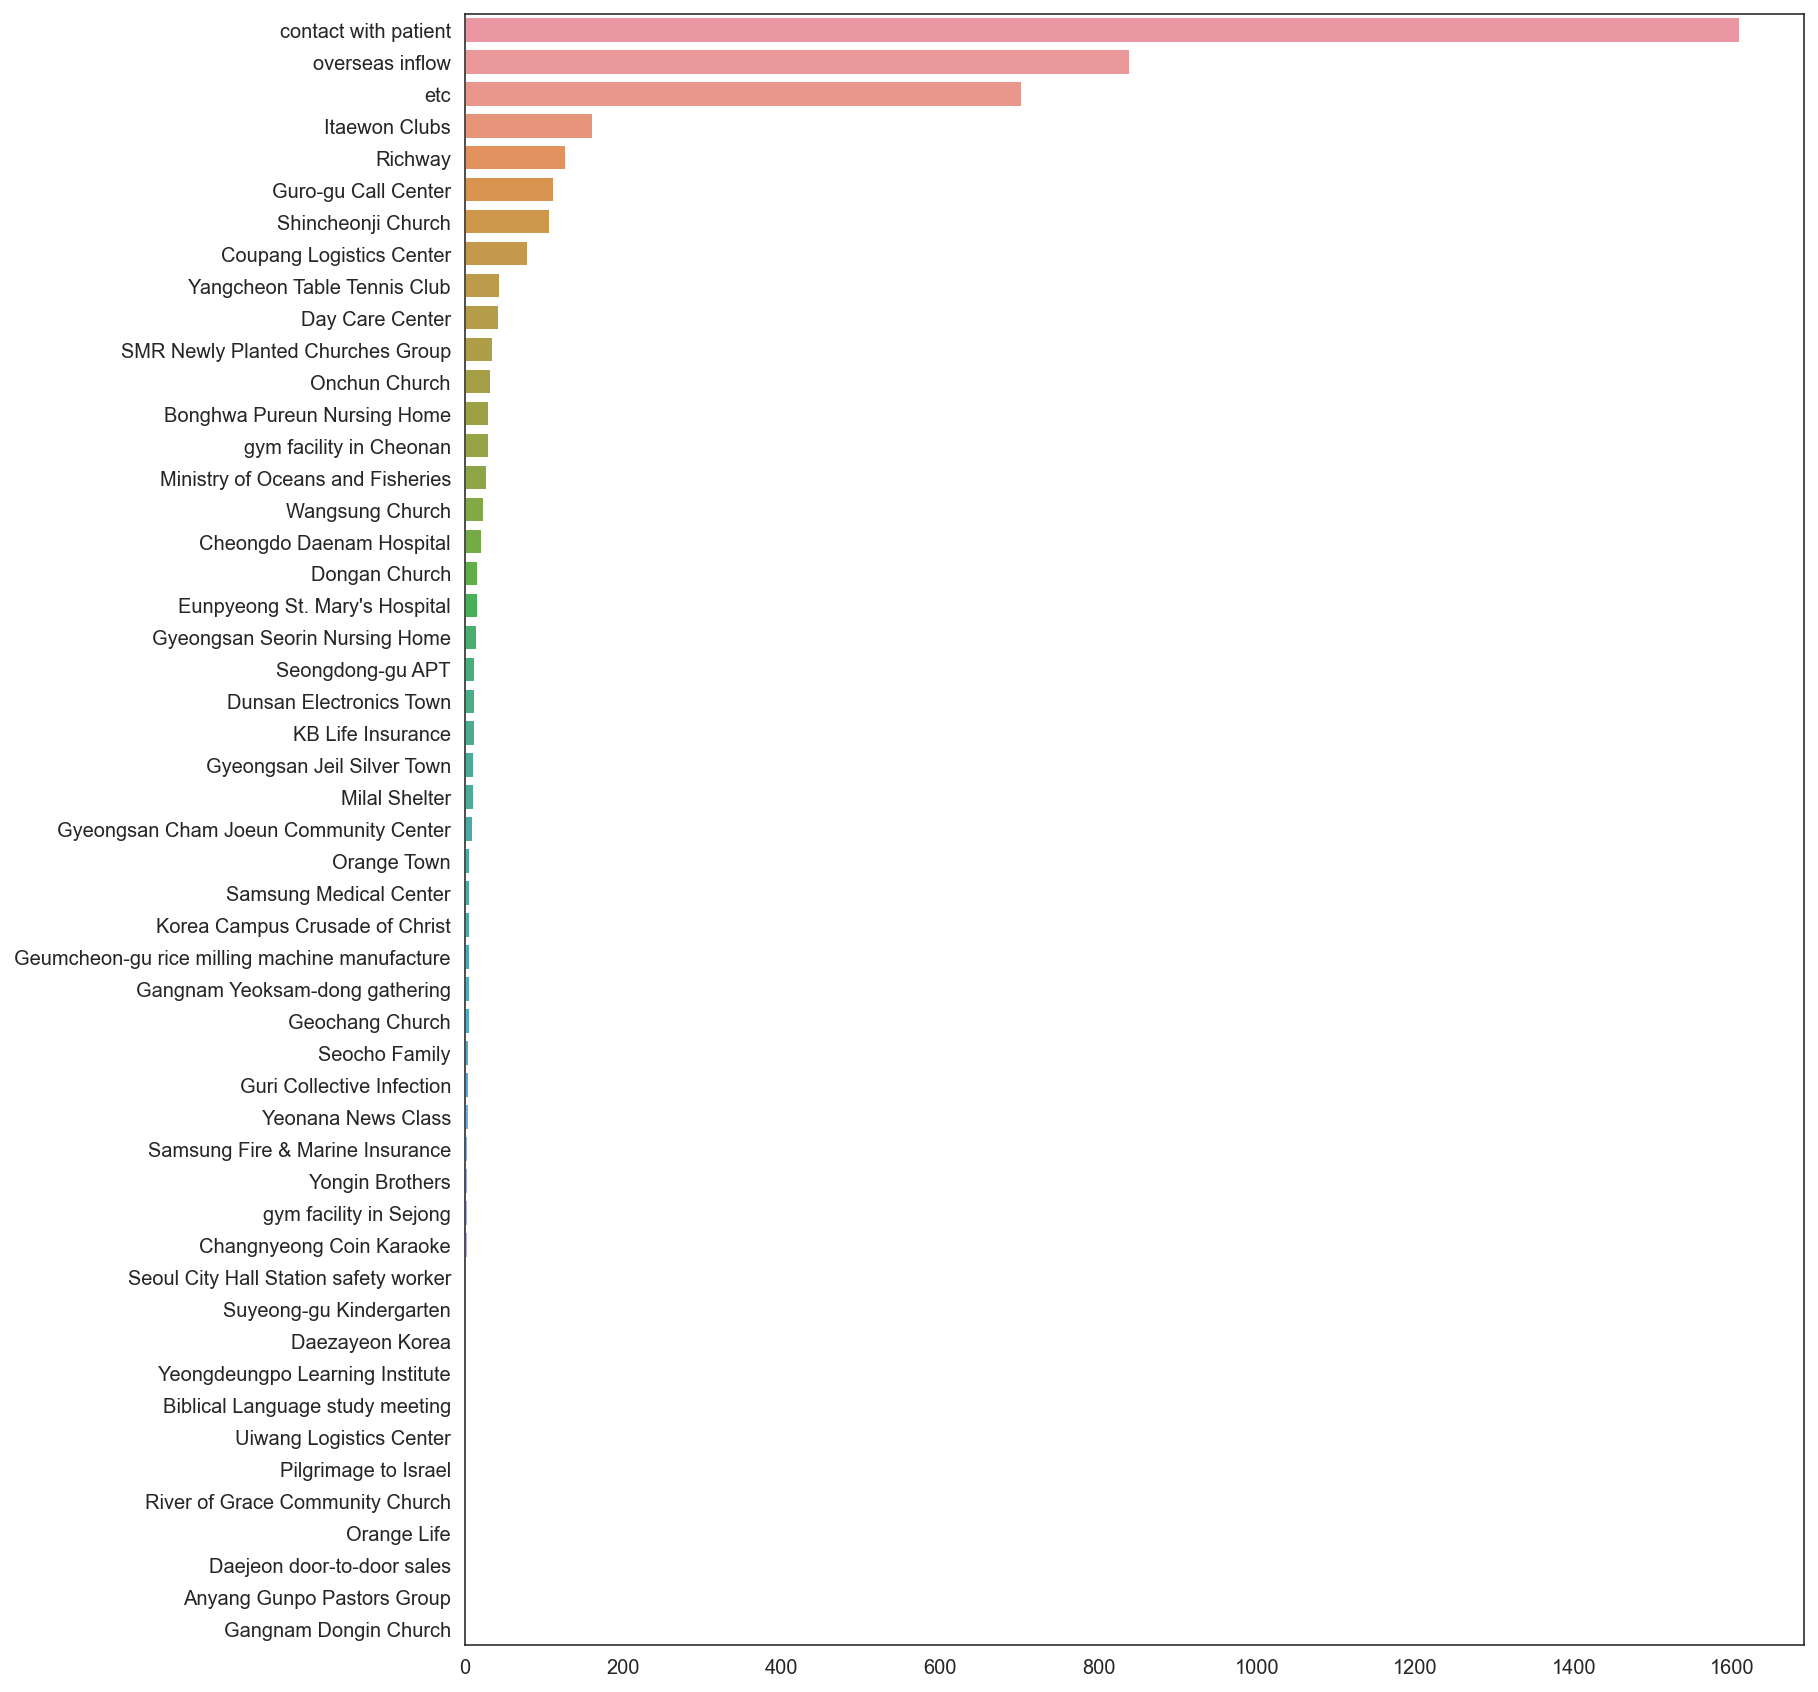

In [6]:
# 코로나-19 감염경로
corona_infection = corona['infection_case'].value_counts().sort_values(ascending = False)

# 시각화
plt.figure(figsize = (12,15))
sns.barplot(x = corona_infection.values, y = corona_infection.index)
plt.show()

코로나-19의 주요 감염 경로는 1. 바이러스가 들어있는 비말이나 작은 입자를 내뿜는 감염자 가까이에서 공기를 들이마실 때 2. 바이러스가 묻은 손으로 눈, 코, 입을 만질 때입니다. 위 그래프에서도 확인할 수 있듯 대부분이 타인과의 접촉으로 인해 감염됩니다. 이러한 특수성 때문에 비대면 배달산업이 성장하게 되었습니다.

### 코로나-19로 인한 배달 산업의 변화

In [7]:
def plot_count(df, title, color):
    # datetime 형식으로 변경
    df['PROCESS_DT'] = pd.to_datetime(df['PROCESS_DT'])

    # 중복값 삭제
    df.drop_duplicates(subset = 'SN', inplace=True)

    # 인덱스를 시간으로 지정
    df.index = df['PROCESS_DT']

    # 일주일 단위로 count 세줌
    df_count = df.resample('D')['SN'].count()

    # 데이터프레임으로 만듦
    df_count = pd.DataFrame(df_count)

    # 누락값 제거(5월 18일)
    df_count = df_count.loc[df_count['SN'] > 0]
    
    # 코로나-19 확산 전후 배달건수
    df_count.iplot(kind='line',xTitle='Datetimes',yTitle='Demand',title= title, color = color)
    
def plot_sum(df, title, color):    
     # datetime 형식으로 변경
    df['PROCESS_DT'] = pd.to_datetime(df['PROCESS_DT'])

    # 중복값 삭제
    df.drop_duplicates(subset = 'SN', inplace=True)

    # 인덱스를 시간으로 지정
    df.index = df['PROCESS_DT']

    # 일주일 단위로 count 세줌
    df_sum = df.resample('D')['GOODS_AMOUNT'].sum()

    # 데이터프레임으로 만듦
    df_sum = pd.DataFrame(df_sum)
    df_sum = df_sum.loc[df_sum['GOODS_AMOUNT'] > 0]

    # 코로나-19 확산 전후 배달 매출액
    df_sum.iplot(kind='line',xTitle='Datetimes',yTitle='Demand',title=title, color = color)

In [8]:
# 데이터 불러오기
df = pd.read_csv('data/KT_빅데이터플랫폼_데이터셋/dlvr_call.csv')

In [9]:
# 코로나-19 확산 전후 배달건수
plot_count(df, title = '코로나-19 확산 전후 배달건수', color = 'red')

국내 첫 확진자는 1월 20일에 발생하였습니다. 배달건수가 조금씩 감소하였지만 국내의 코로나-19 확진자가 급격히 늘어났던 2,3월에는 평균적으로 높은 배달건수를 보였습니다. 

- 5월 18일에는 데이터가 기록되지 않은 것으로 보입니다.
- 대체로 sin 그래프와 같은 일정한 패턴을 보입니다. 이는 평일보다 주말에 배달 건수가 많기 때문으로 보입니다. 

In [11]:
# 코로나 확산 전후 배달 매출액
plot_sum(df, title = '코로나-19 확산 전후 배달 매출액', color = 'darkblue')

배달 매출액 또한 배달건수와 유사한 패턴을 보입니다.

In [13]:
# 월별로 나눠줌
df_count = df.resample('M')['DLVR_STORE_INDUTY_NM'].value_counts()
df_count =pd.DataFrame(df_count)
df_count = df_count.unstack()

In [14]:
# stack bar 시각화 함수
def plot_stackbar(df, title):

    comp_trace = []
    name = ['도시락', '돈까스/일식', '배달전문업체', '분식', '아시안/양식', '야식', '족발/보쌈', '중식', '찜탕', '치킨', '카페/디저트', '패스트푸드', '피자', '한식', '회']

    for i in range(len(name)):
        trace = go.Bar(
            x = df.index, 
            y = df['DLVR_STORE_INDUTY_NM'][name[i]].values, 
            name = str(name[i]))
        comp_trace.append(trace)

    data = comp_trace

    layout = go.Layout(
        barmode = 'stack',
        title = title, 
        xaxis=dict(title='Date'))

    fig = go.Figure(data = data, layout=layout)
    py.iplot(fig)

In [15]:
plot_stackbar(df = df_count, title = '전국의 월별 주문량 그래프')

* 주의 : x축은 해당 월의 전날까지의 합계입니다!
* 우측의 카테고리를 클릭하시면 해당 카테고리만 볼 수 있습니다.
* 우측 카테고리를 더블 클릭하시면 초기화 됩니다.
* 커서에는 (해당 월의 말일, 배달 건수)로 표시됩니다.

<b>월별 배달 음식 주문량 그래프를 보면 배달 주문량이 꾸준히 증가하는 것을 확인할 수 있습니다.</b> 그중 치킨의 배달 주문량이 가장 많았고, 한식, 분식 등이 뒤를 이었습니다. 

|업종|눈에 띄는 트렌드|
|:---:|:---:|
|회|기존 오프라인 매장에 익숙했던 메뉴인 '회'의 주문량이 꾸준히 증가하고 있습니다.|
|한식| <b>코로나-19로 인해 오프라인 매장을 이용하기 힘들어짐에  따라 배달을 통해 식사하는 경우가 많아졌기 때문인지 배달과는 거리가 멀었던 한식 시장이 계속 성장하는 것을 확인 할 수 있습니다. 이러한 흐름은 코로나-19가 끝난 후에도 정착 될 것으로 예상됩니다.</b>|
카페/디저트|<b>카페, 디저트라는 업종 특성상 오프라인 매장에서 즐기는게 익숙합니다. 코로나-19 확산이 심할 때는 '홈카페'라는 키워드가 등장할만큼 배달 주문량이 높아진 것을 확인할 수 있습니다. 반대로 코로나-19 확진자 수가 적었을 때는 주문량이 감소하는 경향이 있습니다.</b>|
찜탕. 중식, 돈까스/일식, 도시락|한식과 비슷하게 배달을 통해 식사하는 경우가 잦아지며 찜탕과 중식, 돈까스/일식, 도시락의 주문량 또한 꾸준히 증가하고 있습니다.|
|분식|분식의 경우엔 매우 뚜렷한 성장세를 보이고 있습니다. 떡볶이 프랜차이즈 시장이 커지면서 이와 같은 결과를 보인 것 같습니다.|

# 본론

### 구로구에 대해서

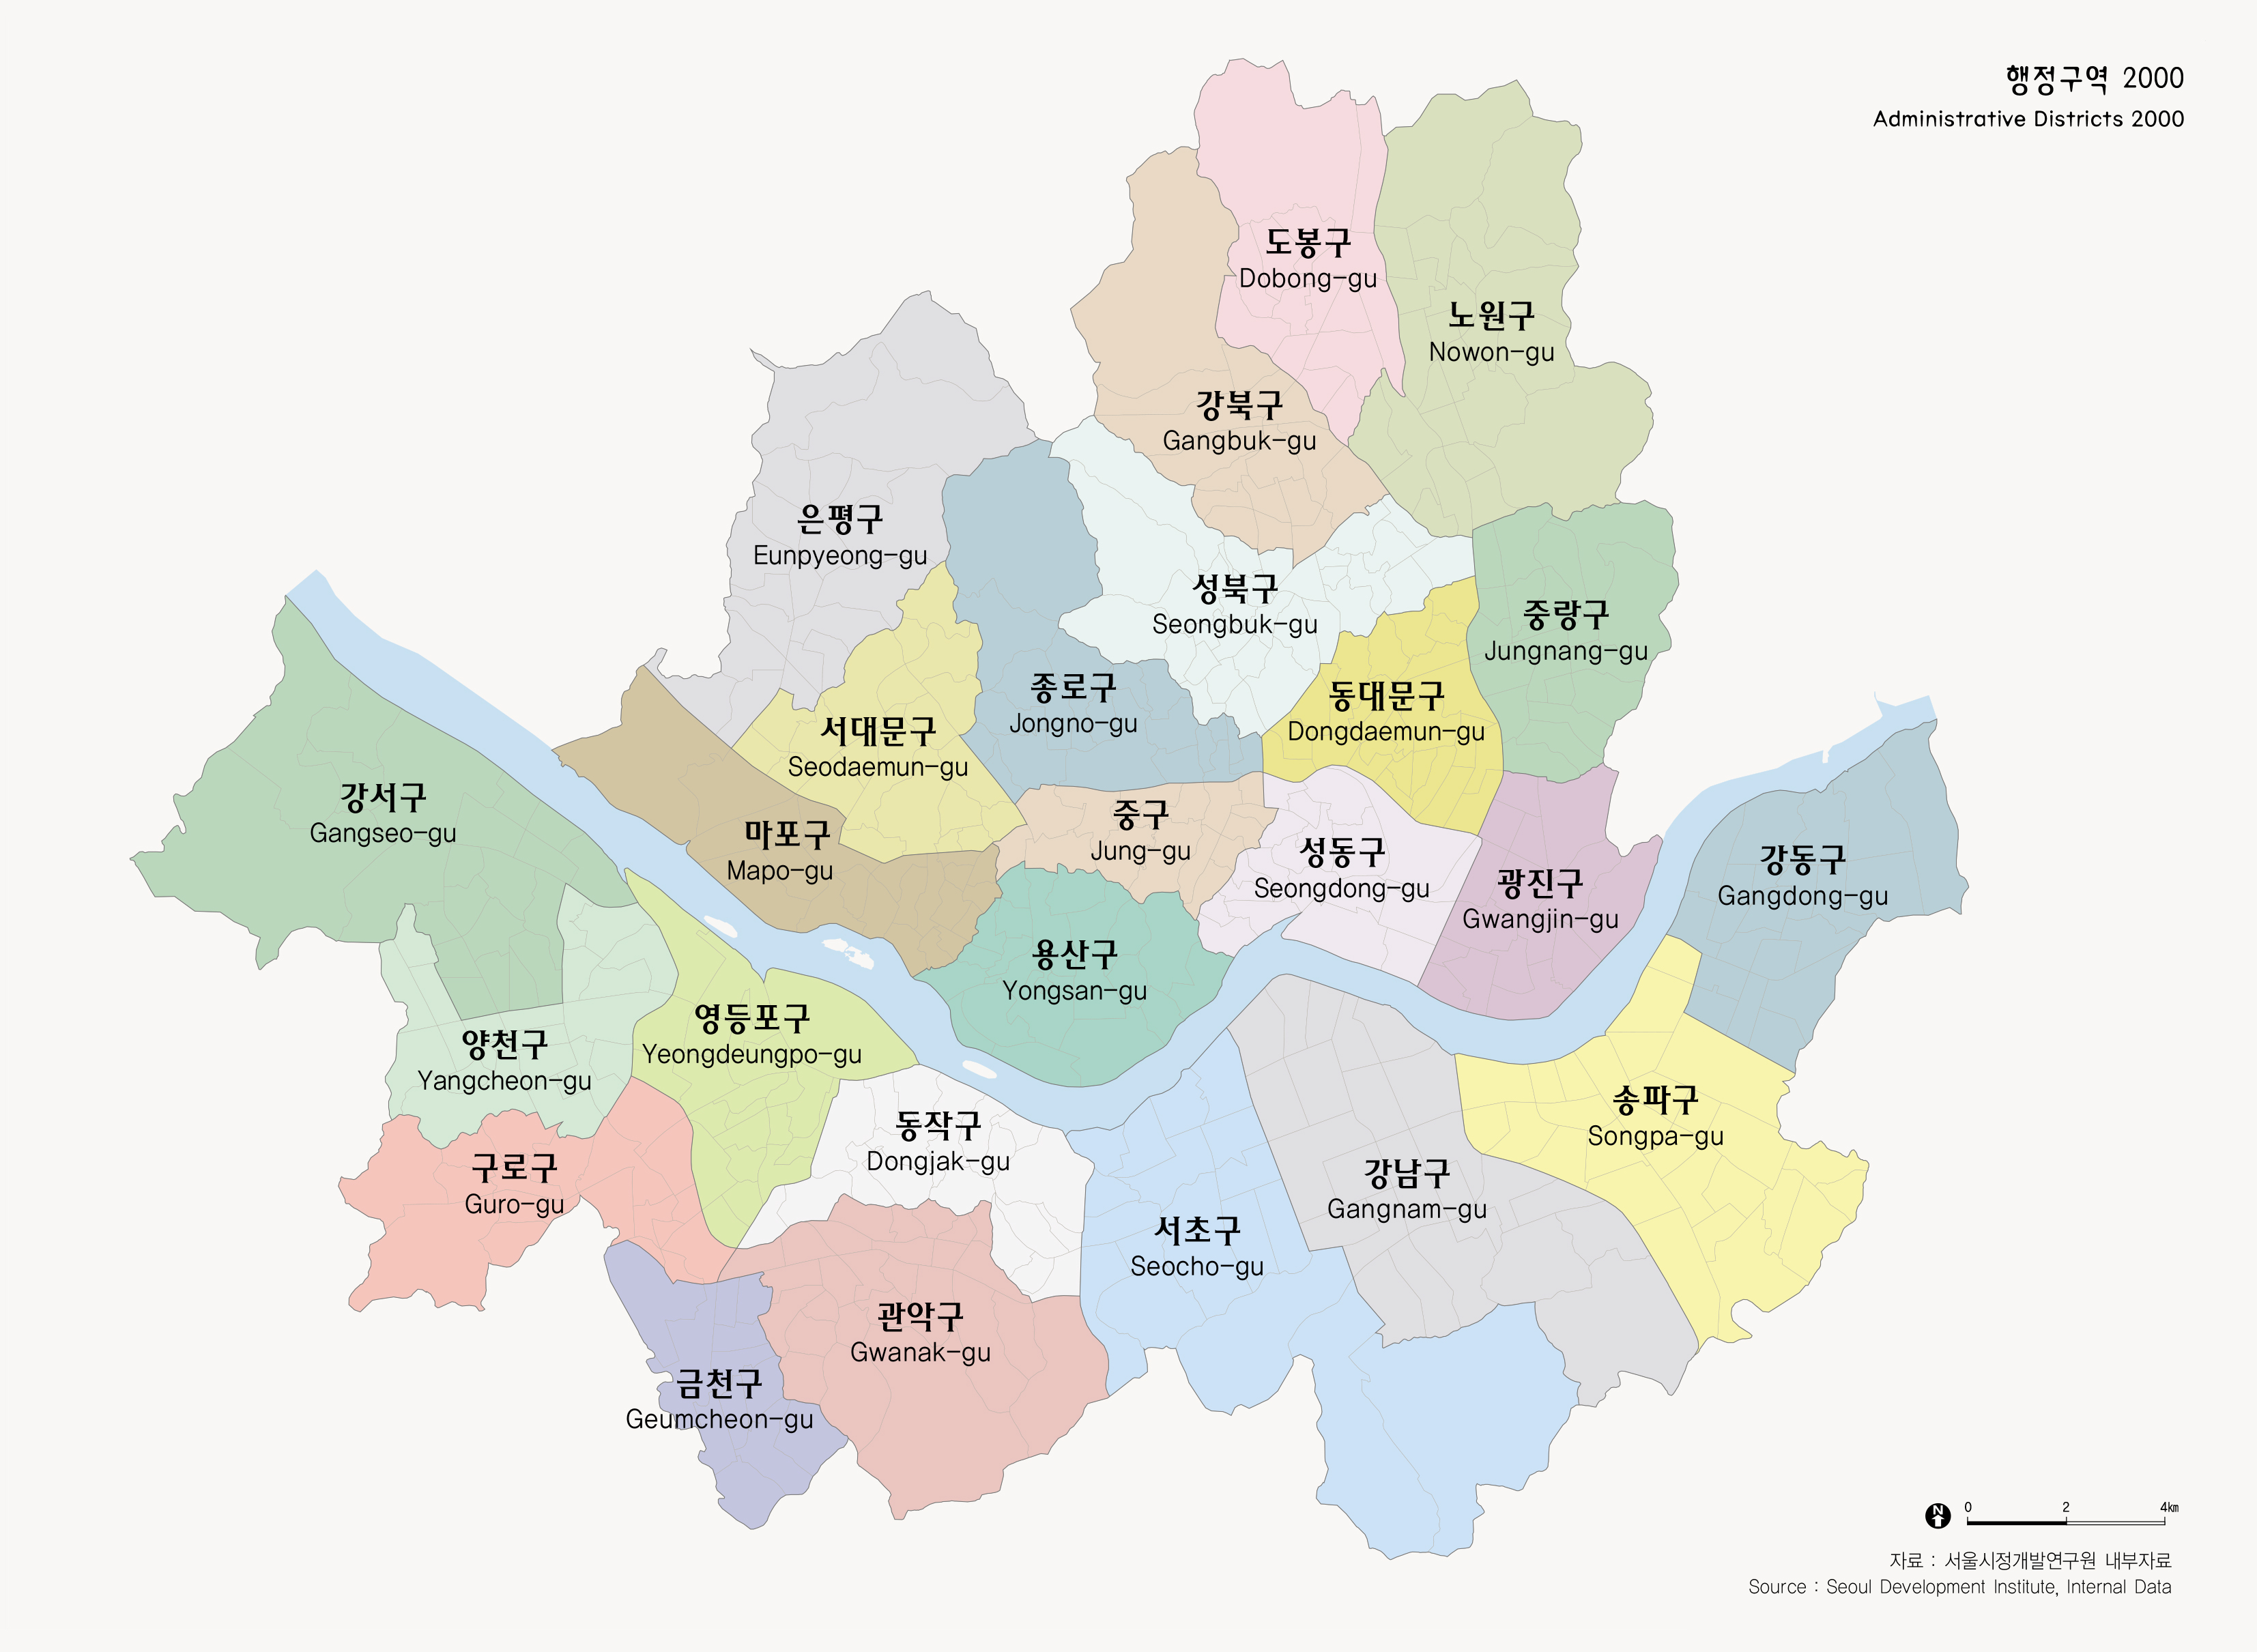

In [16]:
# 서울시 행정동 그림
Image('data/서울시 행정동.jpg')

<b>저희는 서울 지역에서 데이터 수가 가장 많이 기록되어 있고,  한 팀원의 부모님께서도 구로구에서 자영업을 하시기 때문에 구로구를 중심으로 분석하려고 합니다. </b>구로구는 서울의 강서쪽에 위치해있으며, 북쪽으로는 양천구, 동쪽으로는 동작구, 영등포구, 관악구, 서쪽으로는 경기도 부천시, 남쪽으로는 금천구, 경기도 광명시와 접해있습니다.

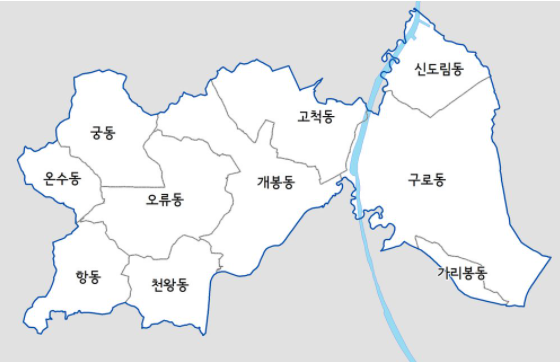

In [17]:
# 구로구 행정동 그림
Image('data/구로구 행정동.PNG')

구로구 10개의 법정동 지역은 위 그림과 같습니다.

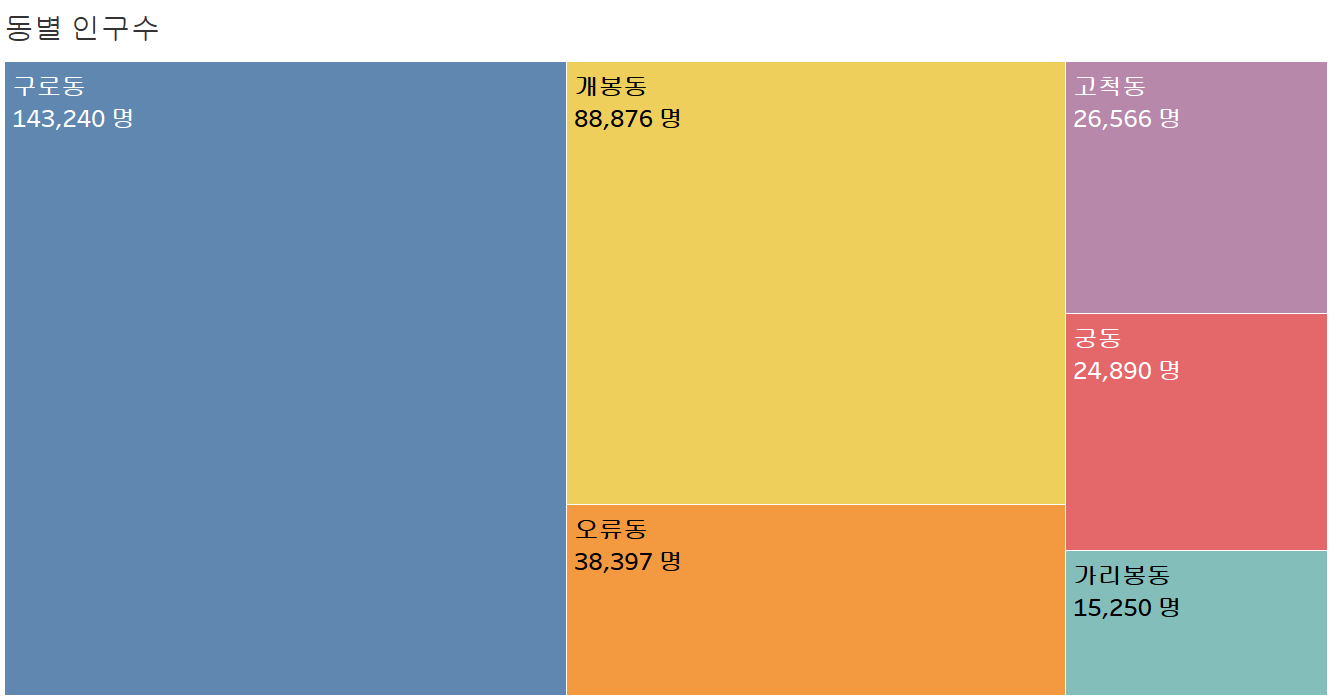

In [18]:
# 태블로로 만든 구로구 등록인구
Image('data/구로구 등록인구.png')

위 그림은 태블로로 그린 구로구 동별 인구 수 입니다. 등록인구는 구로동이 143,240명, 개봉동이 88,876명이고 나머지 동은 1.5~4만명 사이입니다.

   ## 1. 구로구 배달산업 분석

In [19]:
# 구로구 데이터
guro = pd.read_csv('data/구로구 데이터(전처리 완료).csv')
guro_copy = guro.copy()

분석을 위해 도로명 주소와 geocoding을 이용해 위도, 경도 변수를 생성 및 전처리 하였습니다. 전처리 내용은 아래와 같습니다.

주요 전처리 내용
- 배달이 취소된 데이터는 제외하였습니다. (DLVR_REQUST_STTUS_VALUE'] == 1)만 사용
- 배달 상품금액이 0인 데이터 또한 3만개 가량 되었습니다. 상식적으로 배달 상품금액이 0인 것은 이해하기 힘듭니다. 저희 팀은 기프티콘이나 쿠폰을 통해 구매한 것으로 생각했습니다. -> 대회 문의를 확인해보니 배달 플랫폼 중 금액 연동이 안되는 업체 때문에 배달 상품 금액이 0으로 나온 것을 확인했습니다. 차후 분석에서 배달금액을 통한 분석을 진행하기 때문에 제외하였습니다.
- E+*로 표기된 도로명 주소를 정수로 변환하였습니다.
- 배달 상점 도로명코드, 배달 목적지 도로명코드가 '\N'로 저장된 데이터가 많았습니다. 다른 컬럼과의 연관성을 통해 유추하려 했지만 불가능해보였으므로 제외하였습니다.

### 배달 건수 및 매출액

In [20]:
plot_count(guro, title = '구로구의 코로나-19 확산 전후 배달건수', color = 'skyblue')

- 국내 첫 코로나-19 확진자가 나왔던 주에는 배달건수가 감소하였고 이후에는 배달 주문량이 증가하는 모습을 보입니다.
- <b>2020년 3월 9일. 구로구 신도림동에 위치한 코리아빌딩에서 발생한 집단감염이 발생하였고, 전월 대비 감소하는 추이를 확인 할 수 있습니다.</b>

In [22]:
plot_sum(guro, title = '구로구의 코로나-19 확산 전후 배달 매출액', color = 'orange')

배달 매출액 또한 배달 건수와 유사한 패턴을 보입니다. 전국의 배달 매출액을 보았을 땐 우상향하는 그래프가 눈에 띄었지만 구로구의 경우 크게 눈에 띄진 않았습니다.

### 업종별 배달 건수 분석

In [24]:
# 월별로 나눠줌
guro_cat_count = guro.resample('M')['DLVR_STORE_INDUTY_NM'].value_counts()
guro_cat_count =pd.DataFrame(guro_cat_count)
guro_cat_count = guro_cat_count.unstack()

# 구로구 월별 주문량
plot_stackbar(df = guro_cat_count, title = '구로구의 월별 주문량 그래프')

* 주의 : x축은 해당 월의 전날까지의 합계입니다!
* 우측의 카테고리를 클릭하시면 해당 카테고리만 볼 수 있습니다.
* 우측 카테고리를 더블 클릭하시면 초기화 됩니다.
* 커서에는 (해당 월의 말일, 배달 건수)로 표시됩니다.

이번엔 전국의 월별 배달 음식 선호도 그래프와 비교하여 구로구의 월별 배달 주문량 그래프를 확인해보겠습니다. 이를 통해 구로구의 업종별 트렌드는 어떻게 변화하고 있는가 확인해볼 것입니다.

|업종|눈에 띄는 구로구의 트렌드|
|:---:|:---:|
|회|구로구에선 회 주문량은 감소하고 있습니다.|
|한식|구로구에선 한식 주문량은 감소하고 있습니다.|
|피자|구로구에선 피자 주문량은 감소하고 있습니다.|
|패스트푸드|특이하게도 패스트푸드의 비중이 높은 것을 확인 할 수 있습니다. |
|찜탕|구로구에선 3월 이후 찜탕의 주문량이 폭발적으로 증가하였습니다.|
|아시안/양식|구로구 내에서 가장 많은 상승폭을 보이고 있습니다.|

<b>구로구 내에서는 찜탕, 아시안/양식 업종의 성장세가 두드려졌습니다. 반면 회, 한식, 피자, 패스트푸드 등의 업종은 배달 주문량이 감소하는 것을 확인 할 수 있었습니다.</b>

In [25]:
# 해당 요일을 구해줌
guro['weekday'] = guro['PROCESS_DT'].dt.weekday

# 정수형으로 표기된 요일들을 바꿔줌
guro['weekday'].replace({6 : '일요일', 5 : '토요일',4 : '금요일', 3 : '목요일', 2 : '수요일', 1 : '화요일', 0 : '월요일' }, inplace= True)

# 데이터프레임으로 만들어줌
guro_cat_count2 = pd.DataFrame(guro.groupby('weekday')['DLVR_STORE_INDUTY_NM'].value_counts()).unstack().fillna(0)

# 요일순으로 정렬해줌.
index = ['월요일' , '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
guro_cat_count2 = guro_cat_count2.reindex(index = index)

# 구로구의 요일별 주문량 그래프
plot_stackbar(df= guro_cat_count2, title = '구로구의 요일별 주문량 그래프')

* 주의 : x축은 해당 월의 전날까지의 합계입니다!
* 우측의 카테고리를 클릭하시면 해당 카테고리만 볼 수 있습니다.
* 우측 카테고리를 더블 클릭하시면 초기화 됩니다.
* 커서에는 (해당 요일, 배달 건수)로 표시됩니다.

요일에 따른 업종별 주문량 그래프를 그려보았습니다. 합산 그래프를 보시면 월요일에 가장 적은 주문량을 보이고, 금요일과 주말에 가장 많은 주문량을 보입니다. 이는 치킨의 비중이 매우 높기 때문에 치킨의 패턴을 따라가는 것으로 보입니다.

|업종|눈에 띄는 구로구의 트렌드|
|:---:|:---:|
|회| 일요일보다 토요일에 주문량이 더욱 많습니다.|
|한식|수요일의 주문량이 가장 적습니다.|
|카페/디저트|수요일의 주문량이 월요일보다 조금 적습니다.|
|중식|화요일의 주문량이 제일 적습니다.|
|아시안/양식|목요일의 주문량이 가장 적습니다.|
|돈까스/일식|특이하게도 일요일의 주문량이 가장 적고, 화요일의 주문량이 가장 많습니다.|
|도시락|일요일의 주문량이 0으로 나타났는데 해당 요일엔 데이터가 기록되지 않은 것으로 판단됩니다..|

In [26]:
# DLVR_RCEPT_TIME (접수시간)을 datetime으로 변환 후, index 설정
guro['DLVR_RCEPT_TIME'] = pd.to_datetime(guro['DLVR_RCEPT_TIME'])
guro.set_index(guro['DLVR_RCEPT_TIME'], inplace = True)

# 시간 단위로 count 해줌
guro_hour_count = pd.DataFrame(guro.resample('H')['DLVR_STORE_INDUTY_NM'].value_counts())

# 중복되기 때문에 count라고 rename 해줌
guro_hour_count.rename(columns = { 'DLVR_STORE_INDUTY_NM' : 'COUNT'}, inplace = True)
guro_hour_count = guro_hour_count.reset_index()

# datetime으로 변환한 DLVR_RCEPT_TIME의 hour를 추출
guro_hour_count['hour'] =guro_hour_count['DLVR_RCEPT_TIME'].dt.hour

# groupby를 통해 평균 배달건수를 구해줌
guro_hour_count = guro_hour_count.groupby(['hour', 'DLVR_STORE_INDUTY_NM'])['COUNT'].mean().unstack()

# round()를 통해 반올림
guro_hour_count = guro_hour_count.apply(lambda x : round(x, 2))

# plotly로 시각화
guro_hour_count.iplot(kind = 'line',xTitle='Datetimes',yTitle='Demand',title='구로구의 시간대별 평균 배달건수', colorscale = 'paired')

* 우측의 카테고리를 클릭하시면 해당 카테고리만 볼 수 있습니다.
* 우측 카테고리를 더블 클릭하시면 초기화 됩니다.
* 커서에는 (주문 접수 시간, 평균 주문량)으로 표시됩니다.

시간대에 따른 업종별 평균 주문량 그래프를 그려보았습니다. 대부분의 주문이 점심 시간대인 11-12시와 저녁 시간대인 18-19시에 이뤄지고 있습니다. 또한 업종에 따라 차이는 존재하지만 점심 시간대보다는 저녁 시간대에 더 많은 주문이 이뤄집니다.

 매장에서 수익을 올리는 방법은 크게 두 가지라고 생각됩니다. 첫번째는 제품 판매를 통해 얻는 수익입니다. 두번째는 <b>loss를 줄이는 것입니다. </b>재고 loss를 줄일 수도, 원재료 관리를 철저히 하여 loss를 줄일 수도 있습니다. 최근 최저임금 수준이 오르면서 많은 인건비 지출이 사장님들께는 부담이 되는 경우가 있습니다. <b>불필요한 인건비의 loss를 줄이는 것이 수익을 올리는 또 다른 방법이 될 수도 있습니다. 앞서 요일과 시간대에 따라 그린 업종별 주문량 그래프를 참고하신다면 사장님들께서 주문량이 상대적으로 많은 요일과 시간대를 파악하여 파트타임 직원의 일정이나 매장 휴일 등을 고려하실 수 있을 것입니다. </b>

### 배달 소요 시간 및 배달 거리

In [27]:
# 위도, 경도를 기반으로 거리를 구하는 함수
from math import sin, cos, sqrt, atan2 , radians

def calculateDistance(row):
    R = 6373.0
    pickup_lat = radians(row['DLVR_STORE_LAT'])
    pickup_long = radians(row['DLVR_STORE_LONG'])
    
    dropoff_lat = radians(row['DLVR_DSTN_LAT'])
    dropoff_long = radians(row['DLVR_DSTN_LONG'])

    
    dlon = dropoff_long - pickup_long
    dlat = dropoff_lat - pickup_lat
    
    a = sin(dlat / 2) ** 2 + cos(pickup_lat) * cos(dropoff_lat) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R  * c
    
    return distance

In [28]:
# 위에서 만든 함수로 거리를 구해줌
guro['delivery_distance'] = guro.apply(lambda row : calculateDistance(row), axis = 1)

pd.DataFrame(guro['delivery_distance'].describe())

,delivery_distance
count,242499.000000
mean,1.384546
std,0.942138
min,0.000000
25%,0.736224
50%,1.214400
75%,1.777409
max,8.732990


최대 배달 거리는 8.7km이고, 평균적으로 2km 내로 배달이 이뤄지는 것으로 보입니다.

In [29]:
# datetime으로 변환
guro['PROCESS_DT'] = pd.to_datetime(guro['PROCESS_DT'])
guro['DLVR_RCEPT_HOUR'] = pd.to_datetime(guro['DLVR_RCEPT_TIME'])
guro['DLVR_COMPT_HOUR'] = pd.to_datetime(guro['DLVR_COMPT_TIME'])

# 배달이 걸린 시간. 배달이 완료된 시간 - 배달을 접수한 시간
guro['DLVR_TOTAL_TIME'] = (guro['DLVR_COMPT_HOUR'] - guro['DLVR_RCEPT_HOUR']).astype('timedelta64[m]')

In [30]:
# 국내 최초 코로나-19 집단감염이 시작된 대구 신천지의 감염 날짜를 토대로 코로나 이전과 이후로 데이터를 나눠줌.
# 배달 시간이 최대 120분 이하인 데이터만 집계하도록 함.
before_covid = guro[(guro['PROCESS_DT'] < '2020-02-18') & (guro['DLVR_TOTAL_TIME'] <= 120) & (guro['DLVR_TOTAL_TIME'] > 0)]
after_covid = guro[(guro['PROCESS_DT'] > '2020-02-18') & (guro['DLVR_TOTAL_TIME'] <= 120) & (guro['DLVR_TOTAL_TIME'] > 0)]

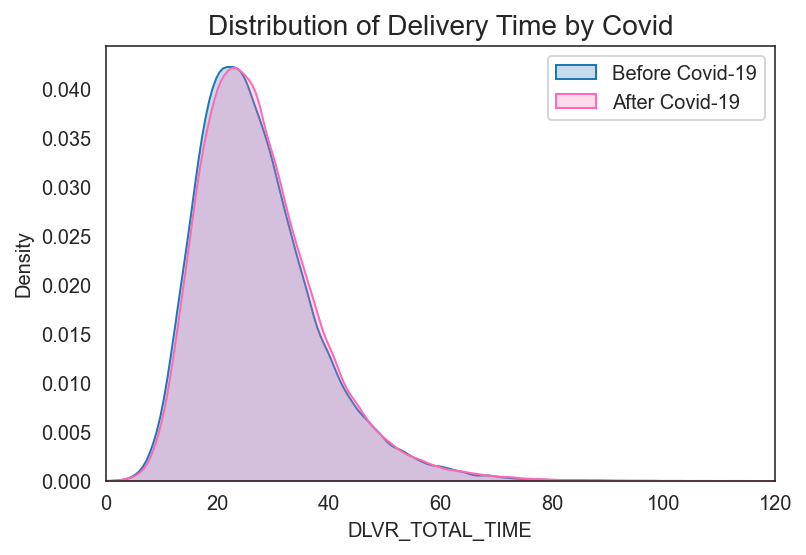

코로나-19 확산 이전의 평균 배달 소요시간 :  27.141
코로나-19 확산 이후의 평균 배달 소요시간 :  27.648


In [31]:
# 코로나 확산 이전과 이후의 배달 거리 차이 kde plot
sns.kdeplot(before_covid['DLVR_TOTAL_TIME'], fill = True, label = 'Before Covid-19')
sns.kdeplot(after_covid['DLVR_TOTAL_TIME'], fill = True, color = 'hotpink', label = 'After Covid-19')
plt.title('Distribution of Delivery Time by Covid', size = 14)
plt.legend()
plt.xlim(0, 120)
plt.show()

print('코로나-19 확산 이전의 평균 배달 소요시간 : ', round(before_covid['DLVR_TOTAL_TIME'].mean(), 3))
print('코로나-19 확산 이후의 평균 배달 소요시간 : ', round(after_covid['DLVR_TOTAL_TIME'].mean(), 3))

저희 팀은 배달 수요의 증가로 인해 평균 배달 소요 시간이 증가할 것이라고 생각했습니다. 배달 시스템, 라이더분의 공급이 안정적으로 유지될 수 있을지에 대한 의문이 있었기 때문입니다. 하지만 데이터상으로 확산 이전과 이후의 평균 배달 소요시간은 큰 차이를 보이지 않았습니다.

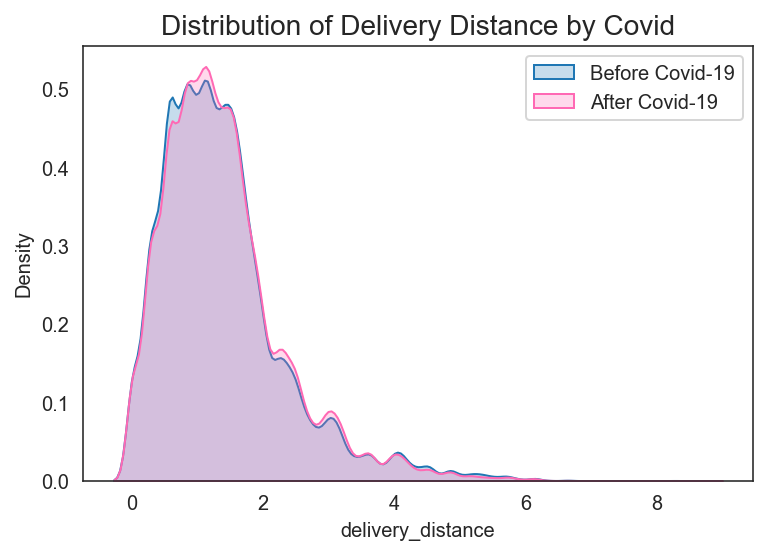

코로나 확산 이전의 평균 배달거리 :  1.38 km
코로나 확산 이후의 평균 배달거리 :  1.389 km


In [32]:
# 코로나 확산 이전과 이후의 배달 거리 차이 kde plot
sns.kdeplot(before_covid['delivery_distance'], fill = True, label = 'Before Covid-19')
sns.kdeplot(after_covid['delivery_distance'], fill = True, color = 'hotpink', label = 'After Covid-19')
plt.title('Distribution of Delivery Distance by Covid', size = 14)
plt.legend()
plt.show()

print('코로나 확산 이전의 평균 배달거리 : ', round(before_covid['delivery_distance'].mean(), 3),  'km')
print('코로나 확산 이후의 평균 배달거리 : ', round(after_covid['delivery_distance'].mean(), 3),  'km')

대부분의 고객은 5km 이내의 지점에서 배달을 시켰습니다. 평균 배달거리의 차이 또한 코로나-19 확산 이후에도 큰 차이는 보이지 않았습니다.

### 클러스터링

In [ ]:
# 가게와 배달 목적지의 경도, 위도를 할당해줌
longitude = list(guro['DLVR_STORE_LONG']) + list(guro['DLVR_DSTN_LONG'])
latitude = list(guro['DLVR_STORE_LAT']) + list(guro['DLVR_DSTN_LAT'])

# 새로운 df를 생성
loc_df = pd.DataFrame()
loc_df['longitude'] = longitude
loc_df['latitude'] = latitude

# NaN을 삭제해줌.
loc_df.dropna(inplace = True)

In [ ]:
# Kmeans 객체를 생성
kmeans = KMeans(n_clusters = 10, random_state=2, n_init = 10).fit(loc_df)
loc_df['label'] = kmeans.labels_

# # 위에서 생성한 Cluster를 시각화함
# plt.figure(figsize = (10,10))
# for label in loc_df['label'].unique():
#     plt.plot(loc_df['longitude'][loc_df['label'] == label], loc_df['latitude'][loc_df['label'] == label], '.', markersize = 5)
    
# plt.title('Cluster of Guro')
# plt.show()

In [ ]:
# Kmeans 객체를 통해 예측함
guro = guro.dropna(subset = ['DLVR_STORE_ROAD', 'DLVR_DSTN_ROAD']).reset_index(drop = True)
guro['pickup_cluster'] = kmeans.predict(guro[['DLVR_STORE_LONG', 'DLVR_STORE_LAT']])
guro['dropoff_cluster'] = kmeans.predict(guro[['DLVR_DSTN_LONG', 'DLVR_DSTN_LAT']])

# 배달기사가 수령했을 때의 시간을 pickup_hour라고 새로운 변수를 생성해줌
guro['pickup_hour'] = guro['DLVR_RCEPT_TIME'].dt.hour

In [ ]:
# cluster 생성
clusters = pd.DataFrame()
clusters['x'] = kmeans.cluster_centers_[:, 0] # 경도
clusters['y'] = kmeans.cluster_centers_[:, 1] # 위도
clusters['label'] = range(len(clusters))

In [ ]:
# 애니메이션 생성
img = plt.imread('data/구로구.PNG')
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(img, extent = [126.775, 126.950, 37.42, 37.54])
# fig, ax = plt.subplots(1, 1, figsize = (10,10))

def animate(hour):
    # ax.clear()
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_title('Delivery Traffic - Hour ' + str(int(hour)) + ':00', size = 14)    
    # plt.figure(figsize = (10,10));
    for label in loc_df.label.unique():
        ax.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 1, markersize = 2, color = 'gray');
        ax.plot(kmeans.cluster_centers_[label,0],kmeans.cluster_centers_[label,1],'o', color = 'r');

    for label in clusters.label:
        for dest_label in clusters.label:
            num_of_rides = len(guro[(guro.pickup_cluster == label) & (guro.dropoff_cluster == dest_label) & (guro.pickup_hour == hour)])
            dist_x = clusters.x[clusters.label == label].values[0] - clusters.x[clusters.label == dest_label].values[0]
            dist_y = clusters.y[clusters.label == label].values[0] - clusters.y[clusters.label == dest_label].values[0]
            pct = np.true_divide(num_of_rides,len(guro))
            arr = Arrow(clusters.x[clusters.label == label].values, clusters.y[clusters.label == label].values, -dist_x, -dist_y, edgecolor='white', width = 3 * pct)
            ax.add_patch(arr)
            arr.set_facecolor('orange')

ani = animation.FuncAnimation(fig,animate,sorted(guro.pickup_hour.unique()), interval = 1000)
plt.close()
ani.save('animation.gif', writer='imagemagick', fps=2)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

시간대별로 각 클러스터에 해당되는 가게 -> 목적지로 가는 애니메이션을 만들어보았습니다. 

- 시간대에 따라 한 클러스터에서 다른 클러스터로의 주문량을 쉽게 볼 수 있었습니다. 
- 점심과 저녁 시간대에 많은 주문이 이루어지는 것을 볼 수 있었습니다.

## 2. 포스트 코로나 시대의 고객 맞춤 전략
- 구로구 내의 폐업 가게
- 맵 시각화를 통해 상권 파악하기
- 배차 시간을 통해 보는 상권 후보 파악하기

> <b> 배달에 적합한 상권인지 파악하는 것이 중요하다. 무턱대고 배달을 한다고 해서 성공하는 것은 아니다. 배달도 될만한 상권이 있다. 해당 지역의 리뷰 수, 주문 수, 입점 업체 숫자를 통하여 배달이 활성화된 지역인지 파악해야 한다. 만약 그렇지 않다면 과감히 해당 상권을 포기하는 것도 필요하다. </b>
[서울경제](https://www.sedaily.com/NewsView/1Z2O61TA06) 발췌

위 기사처럼 배달 서비스도 상권이 중요해졌습니다. 이번 장을 통해 배달 서비스를 아직 시작하지 않으신 사장님께선 적합한 상권을 파악하시고, 배달 서비스를 이미 하고 계시는 사장님이시라면 본인의 매장 위치가 배달이 활성화된 지역인지 아닌지 파악하셨으면 합니다. 하지만 음식이 퀄리티도 좋고, 매장이 배달이 활성화된 지역에 위치하고 있더라도 매출이 저조할 수 있습니다. 이런 상황에 직면하신 사장님들께 배달의 민족의 '울트라콜' 을 이용한 효율적인 고객 맞춤 전략을  제시하려고 합니다.

### 폐업 가게 찾기

In [33]:
# 창폐업 데이터 불러오기
del_region = pd.read_csv('data/KT_빅데이터플랫폼_데이터셋/StartupOrClosing_Region_ver2.csv')

# 구로구만 보기
del_region = del_region[(del_region['SIGUNGU_NM'] == '구로구')]

# 업종 명칭 살펴보기
list(del_region[(del_region['SIGUNGU_NM'] == '구로구')]['INDUTY_NM'].unique())

# 구로구에 위치한 외식업체
del_region[(del_region['INDUTY_NM'] =='치킨')]

,INDEX,DATE,INDUTY_NM,BRTC_NM,SIGUNGU_NM,EMD,LA_DCMLPOINT_VALUE,LO_DCMLPOINT_VALUE,DIVISION
65160,65161,20200626,치킨,서울,구로구,고척동,37.500***,126.866***,0


구로구에 위치해있으면서 외식업을 하는 가게들을 찾아본 결과, 고척동에 폐업(division = 0)을 했던 치킨 가게가 한 곳 있었습니다.  가게가 폐업을 하는 이유는 다양한 이유가 있겠지만 성공을 하는 공통적인 이유는 단 하나입니다.  <b> 음식의 퀄리티와 서비스를 좋으므로 재주문율이 높다는 것입니다! 또한 저희 팀은 해당 매장의 상권과 고객들을 잘 이해하는 것도 중요하다고 생각했습니다. </b> 구로구의 배달 상권을 한 번 분석해봅시다.

### 배달이 활성화된 지역 찾기

In [34]:
# 가게 df를 반환해주는 함수
def make_store_map(df):
    Map = pd.DataFrame(df[['DLVR_STORE_ROAD', 'DLVR_STORE_LAT', 'DLVR_STORE_LONG', 'DLVR_STORE_LEGALDONG_NM']].value_counts()).reset_index()
    Map['DLVR_STORE_ROAD'] = Map['DLVR_STORE_ROAD'].str.split(' ').str[2]
    Map.rename(columns = {'DLVR_STORE_ROAD' : '도로명', 'DLVR_STORE_LAT' : '위도', 'DLVR_STORE_LONG' : '경도', 'DLVR_STORE_LEGALDONG_NM' : '동' ,0 : '배달 건수'}, inplace = True)
    return Map

# 고객 df를 반환해주는 함수
def make_destination_map(df):
    Map = pd.DataFrame(df[['DLVR_DSTN_ROAD', 'DLVR_DSTN_LAT', 'DLVR_DSTN_LONG', 'DLVR_DSTN_SIGNGU_NM']].value_counts()).reset_index()
    Map['DLVR_DSTN_ROAD'] = Map['DLVR_DSTN_ROAD'].str.split(' ').str[2]
    Map.rename(columns = {'DLVR_DSTN_ROAD' : '도로명', 'DLVR_DSTN_LAT' : '위도', 'DLVR_DSTN_LONG' : '경도', 'DLVR_DSTN_SIGNGU_NM' : '구' ,0 : '배달 건수'}, inplace = True)
    return Map

# interactive Map을 보여주는 함수
def plot_map(df, color, title):
    fig = px.scatter_mapbox(df, lat="위도", lon="경도", hover_name="도로명", hover_data=["배달 건수"]
                            , zoom=12, height = 500,size= '배달 건수', color = color, title = title)
    fig.update_layout(mapbox_style="carto-positron")
    fig.update_layout(
            showlegend = True,
            geo = dict(
                landcolor = 'rgb(217, 217, 217)',
            )
        )
    fig.show()

In [35]:
# 가게 Map 시각화
Map = make_store_map(guro)
plot_map(df = Map, color = '동', title = '구로구 가게들의 맵 시각화')

많은 가게들이 등록 인구가 가장 많고 구로 디지털 단지역이 있는 구로동이 아닌 고척동과 개봉동에 위치하고 있습니다. 이유는 구로동의 데이터가 많이 수집되지 않은 것으로 생각됩니다. 

<b>배달 상권을 파악해야하는 첫번째 이유는 라이더분들의 수익 구조 때문입니다.</b> 매장에서 고객에게 음식을 배달하기 위해선 라이더분들의 도움을 받아야합니다. 라이더분들은 수익을 극대화 하기 위해 적은 시간에 많은 배달을 완료하고 싶어합니다. 만약 현재 매장이 배달이 활성화된 지역이라 한 번의 동선으로 여러 개의 배달을 완료할 수 있다는 것은 라이더들에겐 매력적인 요소가 됩니다. <b>두번째는 수익률을 높이기 위해서입니다. </b>배달 대행은 거리별로 돈을 받으므로 무턱대고 넓은 바운더리의 영업을 하게 된다면 수익률은 낮아질 수 밖에 없습니다. 그렇기에 배달 서비스를 제공하는 사장님께선 자신의 고객들이 어디에 많이 위치하고 있는가를 분석해볼 필요가 있습니다.

그럼 고객분들은 주로 어디에 위치하고 있을까요? 

In [36]:
# 목적지 Map 시각화하기
Map = make_destination_map(guro)
plot_map(df = Map, color = '구', title = '구로구 가게들의 주요 고객 맵 시각화')

<b>대부분의 고객들은 구로구 내의 위치</b>하고 잇으며, 고척동 인근과 오류동에서 주문량이 많다는 것을 확인 할 수 있었습니다. 태블로를 통해 인구 구로동의 인구가 매우 많기 때문에 구로동에도 많은 잠재 고객이 있을 것이라 판단됩니다. 또한 <b>구로구의 인근 지역<b>인 양천구, 광명시, 금천구, 영등포구, 관악구, 부천시, 동작구에 거주하는 <b>고객들도 확인 할 수 있었습니다.</b>

### 오프라인 매장 서비스와 배달 서비스의 구조적 차이 이해

> <b> 배달 서비스는 1분도 안 되는 접수 시간과 배달에 걸리는 시간만으로 가게의 서비스 품질이 결정된다. </b>

오프라인 매장의 서비스와 배달 서비스와 확연히 다릅니다. 배달 서비스는 접점 단계가 매우 짧습니다.  

<b>오프라인 매장 서비스 접점 단계</b>
1. 손님 맞이
2. 테이블 안내 
3. 주문 
4. 메뉴 전달 
5. 고객의 요구사항 처리 
6. 계산 
7. 환송

최소 7단계 혹은 그 이상으로 이뤄집니다. 

<b>배달 서비스</b>
1. 주문 접수
2. 배달
3. 계산 

배달 서비스의 접점 단계는 3단계 정도입니다. 여기서 고객에게 맛을 제외한 중요한 포인트는 '배달이 얼마나 빨리 오는가' 또는 '자신이 원하는 시간에 오는가'입니다. 반면 사장님에겐 '라이더의 배차 소요 시간이 얼마나 빠르냐'와 '라이더가 얼마나 신속하게 고객에게 배송하느냐'입니다. 라이더가 얼마나 신속하게 고객에게 배송하는가에 대한 문제는 플랫폼 측에서도 단건 배달로 해결하려고 하는 주요한 이슈입니다.

그렇다면 <b> 남은 문제는 '라이더의 배차 소요 시간이 얼마나 빠르냐'입니다. 이는 앞서 언급했던 배달이 활성화된 지역과도 연결됩니다. 배달이 활성화된 지역이라면 라이더들도 해당 상권 위주로 배달하려고 할 것이고 자연스레 라이더의 배차 시간이 빠를 것입니다. 이를 동별 배달 소요시간 그래프를 통해 확인해보겠습니다. </b>

In [42]:
# 배차가 된 시간을 datetime 형식으로 변경해줌.
guro['DLVR_CARALC_TIME'] = pd.to_datetime(guro['DLVR_CARALC_TIME'])

# 배차까지 걸린 시간. 배차 된 시간 - 배달을 접수한 시간
guro['DLVR_TOTAL_CARALC_TIME'] = (guro['DLVR_CARALC_TIME'] - guro['DLVR_RCEPT_HOUR']).astype('timedelta64[m]')

# 99% 데이터가 35분 안에 배차되었고, 62분 내에 배달이 완료됨
guro['DLVR_TOTAL_CARALC_TIME'].quantile(0.99)
guro['DLVR_TOTAL_TIME'].quantile(0.99)

# 배차 시간이 35분이 넘고, 총 배달시간이 62분이 넘는 이상치는 제외하도록 함
interval = guro.loc[(guro['DLVR_TOTAL_CARALC_TIME'] < 35) & (guro['DLVR_TOTAL_TIME'] < 62)][['DLVR_STORE_LEGALDONG_NM','DLVR_RCEPT_HOUR', 'DLVR_CARALC_TIME', 'DLVR_COMPT_HOUR', 'DLVR_TOTAL_CARALC_TIME', 'DLVR_TOTAL_TIME']]

# groupby를 통해 동별 평균 배차시간, 배달이 완료된 시간을 구함
interval_mean = interval.groupby('DLVR_STORE_LEGALDONG_NM')[['DLVR_TOTAL_CARALC_TIME', 'DLVR_TOTAL_TIME']].mean().round(2)

# 컬럼명을 한글로 바꿔줌
interval_mean.rename(columns = {'DLVR_TOTAL_CARALC_TIME' : '배차 소요시간', 'DLVR_TOTAL_TIME'  : '총 배달 소요시간'}, inplace = True)

# 총 배달시간이 빠른 순으로 정렬
interval_mean.sort_values('총 배달 소요시간', inplace = True)

# plotly로 시각화
interval_mean.iplot(kind = 'bar',xTitle='동',yTitle='걸린 시간(분)',title='구로구의 동별 평균 배달 소요시간 (매장 위치 기준)', colorscale = 'paired')

- 항동의 총 배달 소요시간이 23분으로 가장 빨랐습니다. 개봉동, 온수동 등 다른 동들도 30분 이내에 배달을 완료했습니다. 
- 항동의 배차 소요시간이 3.82분으로 가장 빨랐습니다. 대다수 동의 배차 소요시간도 5분 이내였습니다. 온수동은 총 배달 소요시간에 비해 배차 소요시간이 오래 걸리는 동입니다. 
- 가리봉동은 배차 소요시간(7.2분)과 총 배달 소요시간(34.37분)이 매우 늦게 걸리는 것으로 확인됐습니다. 배달 소요시간이라는 측면에서 보았을 때, 가리봉동은 적합한 상권은 아닌 것으로 보입니다.

배달 상권 후보지로 '고척동'은 괜찮은 선택으로 보입니다. <b>하지만 자영업이란 것이 수학 공식처럼 '상권이 좋으면 성공한다'는 성립하지 않습니다. 자영업의 성공에는 매우 복합적인 요소들이 필요합니다.</b>

배달의 민족에서는 ``울트라콜``이라는 기능이 있습니다.  월 8만 8천원을 내고 특정 지역에 노출도를 높여서 매출을 늘릴 수 있습니다. (깃발 꽂기라고 표현합니다.) 하지만 많은 지역에 5~10개씩 꽂는다면 비용이 꽤나 부담스럽습니다. <b>만약 폐업을 하신 사장님께서도 자신들의 팬이 어디에 많이 있고, 어떤 아이템을 선호하는지 분석하셨다면 더 효율적인 판매 전략을 짜실 수 있으셨을 것이라 생각했습니다. 혹시 저희가 도움을 드릴 수 있는 고척동의 치킨집이 있는지 한 번 살펴볼까요?</b>

### 주변 경쟁업체 배달 건수 및 매출액 분석

In [38]:
# 고척동에 위치하고 치킨을 판매하는 주변 경쟁 업체
rival = guro[(guro['DLVR_STORE_LEGALDONG_NM'] == '고척동') & (guro['DLVR_STORE_INDUTY_NM'] == '치킨')]

# 평균 판매가와 총 수익, 배달 건수를 구하고, 상위 10개의 업체 선정
rival.groupby('DLVR_STORE_ID')['GOODS_AMOUNT'].agg(['mean', 'sum', 'count']).sort_values('count', ascending = False).head(10)

,mean,sum,count
DLVR_STORE_ID,,,
S0000192,22180.747664,35600100,1605
S0000113,21292.567493,15458404,726
S0000176,22362.416107,13328000,596
S0000251,25980.737705,12678600,488
S0000255,21163.235294,8634600,408
S0000172,21531.903797,8505102,395
S0000181,23237.795276,8853600,381
S0000218,18422.872340,6927000,376
S0000220,22065.633803,7833300,355


 대부분의 가게들이 2만원 초반의 판매가를 형성하고 있습니다. 'S0000192', 'S0000113', 'S0000176'가  고척동에서 주문율이 높은 상위 3개의 매장입니다. 심지어 매출 1위인 S000192 매장의 매출액은 2,3위의 매출액을 합한 것보다 더욱 많습니다. 만약 'S0000181' 매장이 깃발 꽂기를 통해 더욱 매출액을 높이고, 단골을 늘리려면 어느 위치에 깃발을 꽂아야 할까요?

In [39]:
# S0000181 매장의 주요 고객 맵 시각화
S0000181 = guro.loc[guro['DLVR_STORE_ID'] == 'S0000181']

# 목적지 Map 시각화하기
Map = make_destination_map(S0000181)
plot_map(df = Map, color = '도로명', title = 'S0000181의 주요 고객 맵 시각화')

S0000181의 경우 크게 두, 세 곳으로 나눌 수 있을 것 같습니다. <b>첫번째로 경인로, 중앙로 1길, 중앙로 6길 부근입니다.</b> 많은 고객들이 이 부근에 위치하고 있습니다. 다음으로는 <b>광명시 부근의 사성로와 시청로 부근</b>입니다. 또는 <b>목동남로 4길 부근으로 깃발을 더 추가하여 공격적으로 홍보할 수도 있을 것 같습니다.</b>

 <b>현재 해당 지역의 고객들이 어떤 메뉴를 시켰는지와 같은 구체적인 데이터가 없는 관계로 심화된 분석을 하긴 힘들어 보입니다. 하지만 이와 같은 데이터를 갖고 있다면 어느 지역의 고객이 어떤 메뉴를 선호하는지까지 파악하여 더욱 세분화된 판매 전략을 세울 수 있을 것입니다. </b>

# 결론

저희는 지금까지 코로나-19로 인한 배달 산업의 전반적인 변화에 대해 알아보았고, 그중 구로구를 중심으로 살펴보았습니다.

1. 구로구의 코로나-19 확산 전후 배달 건수 및 매출액을 분석함으로써 배달산업 규모와 변화를 알아보았습니다.
2. 구로구의 코로나-19 확산 전후 업종별 배달건수를 비교해보았습니다.
3. 구로구의 월, 요일, 시간대에 따른 업종별 배달 건수를 분석해보았습니다.
4. 구로구의 코로나-19 확산 전후로 배달 소요시간 및 거리 비교를 해보았습니다.
5. geocoding을 사용하여 가게와 배달 목적지의 도로명 주소를 위경도로 바꾸어 가게와 목적지의 분포를 통해 상권 분석을 해보았습니다.
6. 동별로 배차 시간과 배달이 걸린 시간를 비교해 상권 분석을 해보았습니다.
6. 맵 시각화를 통해 울트라콜 후보 지역 설정해보았습니다.

<b> 저희 팀은 '딜리버리 마케팅'이라는 분야가 더욱 깊어질 것이라 생각됩니다. 이미 도움이 필요하신 사장님들 또한 많을 것입니다. 지금 저희가 한 분석과 같은 배움과 정보들을 함께 공유한다면, 이 업계가 더욱 풍부해지지 않을까 싶습니다. </b>

# 마치며 

겉으로 드러나지 않는 것을 찾아내는 일은 매우 흥미로운 일입니다. 이런 활동들이 많은 분들에게 도움이 된다면 그보다 더 좋은 일은 없을것 같습니다. 이번 경진대회에서 수많은 데이터를 다루고, 정제하는 과정에서 많은 난관에 부딪히기도 했습니다. 하지만 작은 난관들을 넘어서다 보니 좋은 결과를 도출 할 수 있었던 것 같습니다. 아직 데이터 분석을 공부하지 얼마 안 된 팀원들이 모인 팀인지라 부족한 부분이 보일지라도 귀엽게 봐주세요. 

긴 글 읽어주셔서 감사합니다. TEAM ASAN이었습니다.

## 출처 

1. 구로구인구 통계자료 :[통계청](https://kosis.kr/statHtml/statHtml.do?orgId=517&tblId=DT_51701N_003&vw_cd=&list_id=&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=)


2. 참조 기사 : 
- [배달은 정말 외식업 사장님 살렸나 - 더스쿠프](http://www.thescoop.co.kr/news/articleView.html?idxno=50081)

- [배달의 민족 깃발 꽂기 관련 기사 - 조선일보](https://ceo.baemin.com/guide/G11004)

- [음식 배달, 나는 잘하고 있는가?](https://www.startuptoday.kr/news/articleView.html?idxno=11867)

- [성공 위한 배달 마케팅 비법](https://www.sedaily.com/NewsView/1Z2O61TA06)
    